# Метод главных компонент (PCA - Principal Component Analysis) - Часть 1 - ручная реализация

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Набор данных "Breast cancer wisconsin (diagnostic) dataset"
--------------------------------------------

**Описание данных (источник на английском языке):**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [5]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


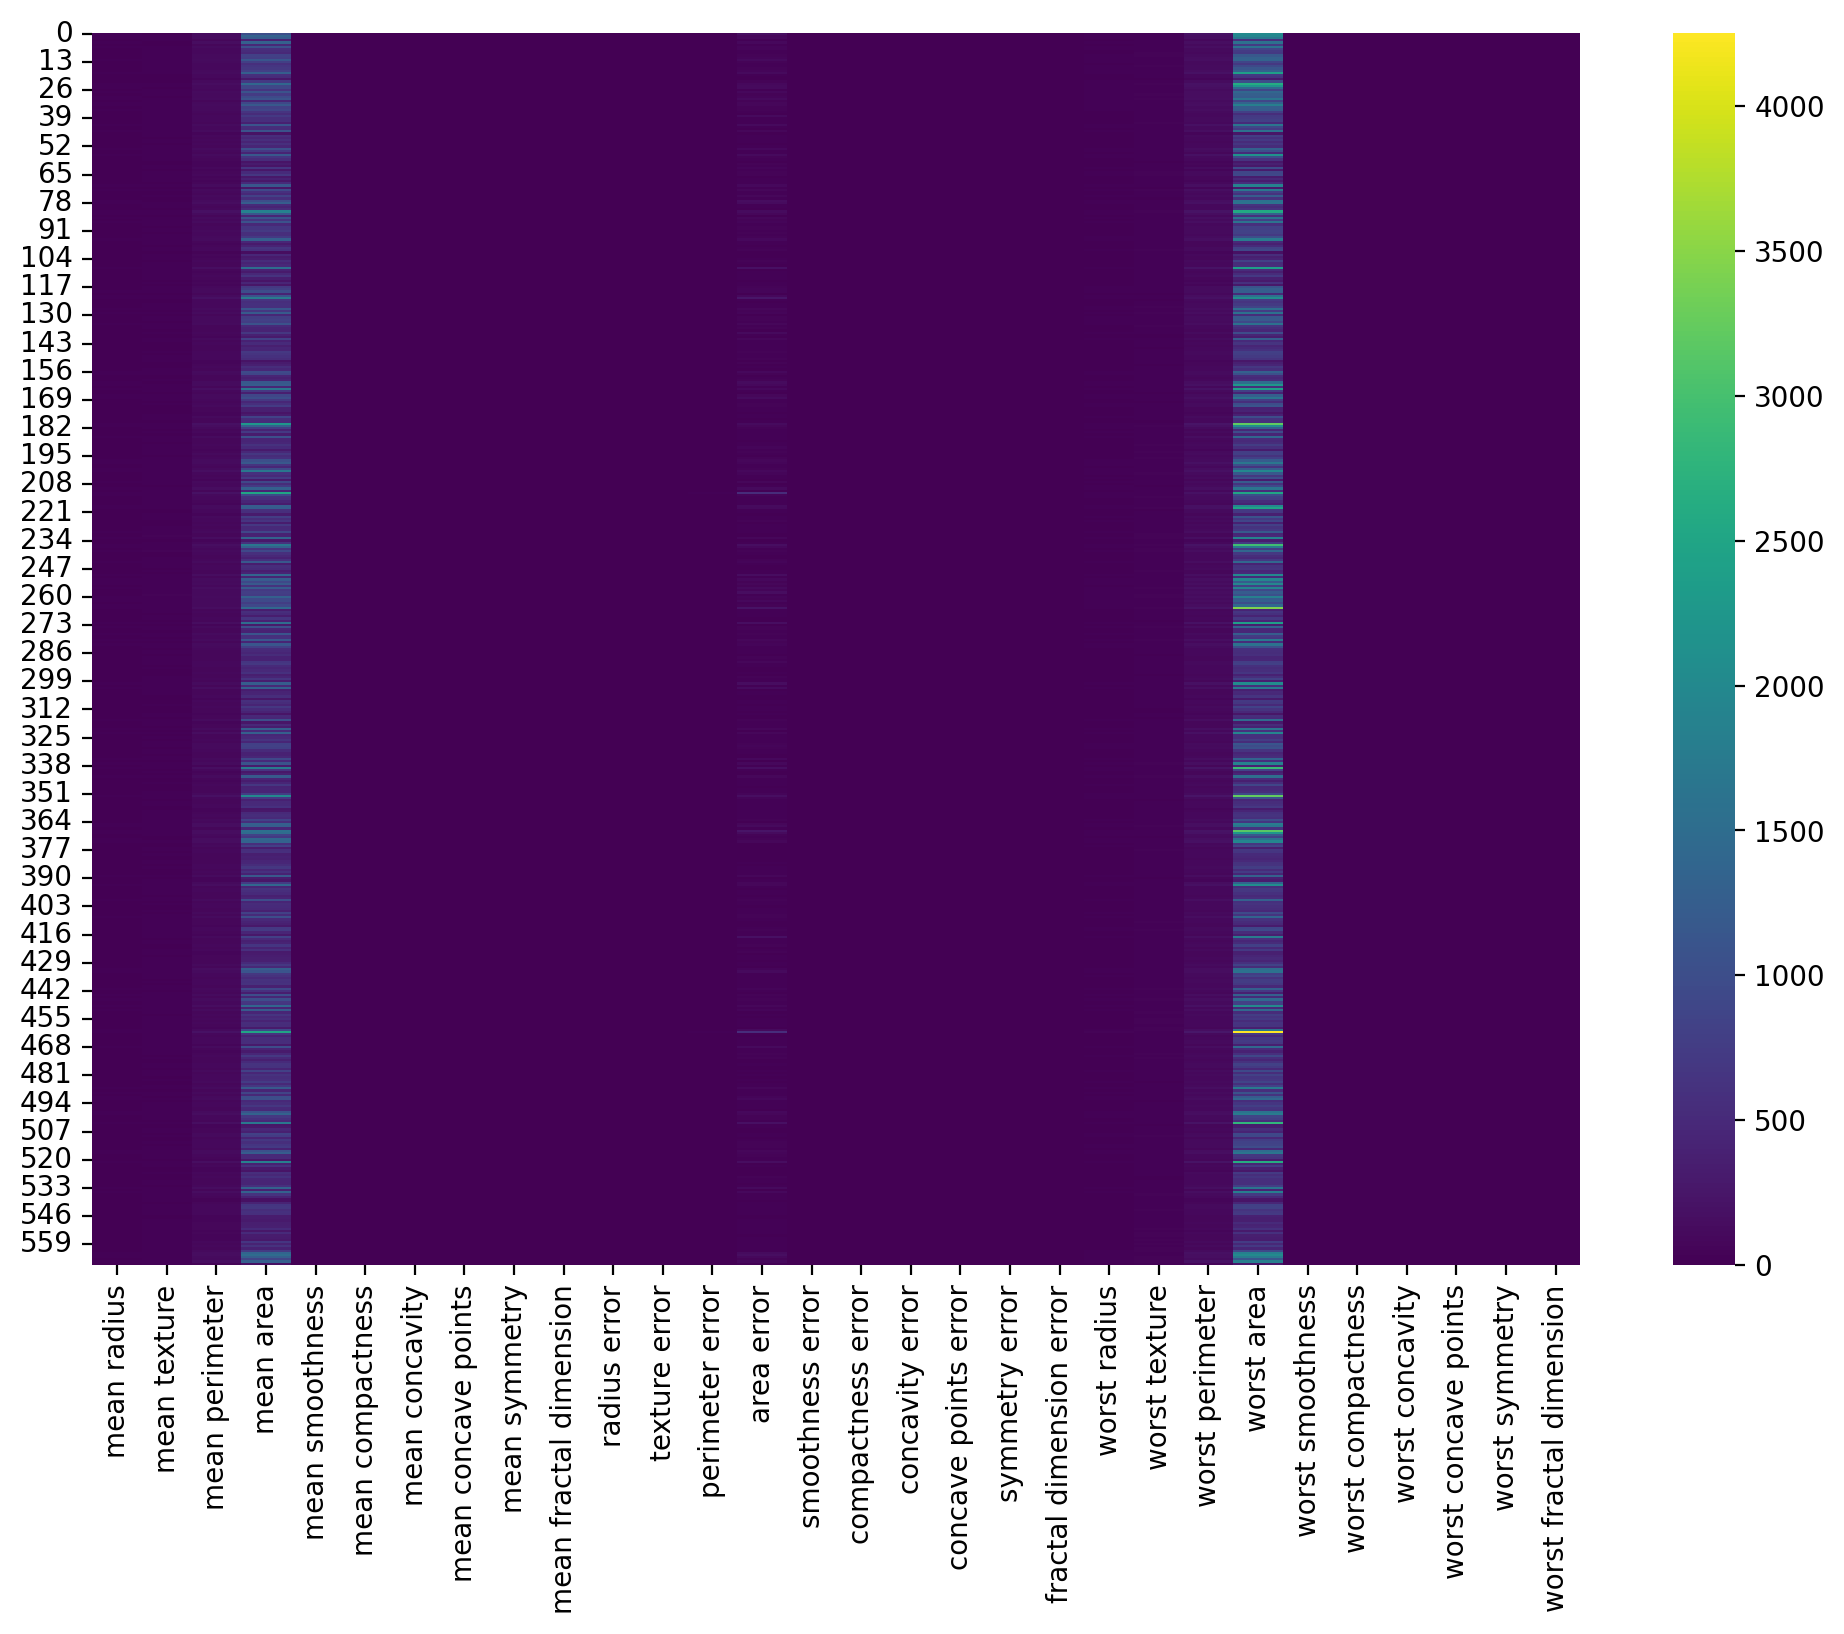

In [11]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(df, cmap='viridis')
plt.show()

Здесь, хотелось бы уменьшить количество признаков. Мы не просто выберем какие-то отдельные признаки, а перейдём от этих 30 признаков, к некоторым другим 30 признакам, из которых уже сможем взять только некоторые из них.

## Реализуем метод главных компонент вручную
### Масштабирование данных

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [18]:
scaled_X = scaler.fit_transform(df)

In [20]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [22]:
scaled_X.mean()

np.float64(-6.826538293184326e-17)

Видим практически нулевое значение

In [25]:
scaled_X.mean(axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

По всем измерениям также видим практически нулевые значения.

### Вычисляем ковариационную матрицу

In [29]:
# Нам нужны только ковариации между признаками,
# поэтому укажем rowvar=False
covariance_matrix = np.cov(scaled_X, rowvar=False)

### Вычисляем собственные вектора и собственные значения (Eigen Vectors and Eigen Values)

In [32]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [34]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

Это набор чисел для каждого из исходных признаков.

In [37]:
eigen_vectors.shape

(30, 30)

Это набор из 30 векторов, каждый из них состоит из комбинации исходных 30 векторов. Для каждого из 30 новых векторов были сохранены 30 компонент в терминах исходных векторов.

### Выбираем некоторое количество компонент

Для начала возьмём две компоненты, чтобы можно было изобразить результаты на графике.

In [42]:
num_components = 2

### Берём индексы на основе сортировки собственных значений

Метод `np.argsort()` выполнит сортировку данных и вернёт индексы отсортированных данных.

In [46]:
# На простом примере
np.argsort([2, 1, 3])

array([1, 0, 2])

В этом списке есть следующие индексы 0, 1, 2. 

Мы получили индексы 1, 0, 2. Если взять эти индексы, то индекс 1 - это число 1, индекс 0 - это число 2, индекс 2 - это число 3. В итоге мы получили отсортированный список.

In [49]:
np.argsort(eigen_values)

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 28, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

Нам нужна сортировка по убыванию

In [52]:
np.argsort(eigen_values)[::-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 28, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19])

А также, надо взять только первые два компонента

In [55]:
np.argsort(eigen_values)[::-1][:num_components]

array([0, 1])

In [57]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

### Берём только выбранное нами количество компонент (num_components) из наборов данных Eigen Values и Eigen Vectors

In [60]:
# Сохраним в те же самые переменные 
# уже сокращённые наборы значений

# eigen_vectors[:, sorted_key] - берём
# все строки, но только для выбранных колонок

eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

**Мы перешли от 30 компонент только к 2 главным компонентам**

### Выполняем скалярное произведение (dot product) исходных данных и собственных векторов

**Этот шаг "проецирует" исходные данные на главные компоненты**

`np.dot()` - скалярное произведение

Возьмём исходные данные и спроецируем их в пространство собственных векторов, которые являются главными компонентами. Будем проецировать исходные данные scaled_X, в которых было 30 признаков, в пространство eigen_vectors, в котором только два измерения.

In [66]:
principal_components = np.dot(scaled_X, eigen_vectors)

In [68]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Видим здесь столько же строк, сколько в исходных данных scaled_X, но теперь каждая строка имеет только две колонки - это координаты в новом пространстве признаков.

### Визуализируем полученный результат

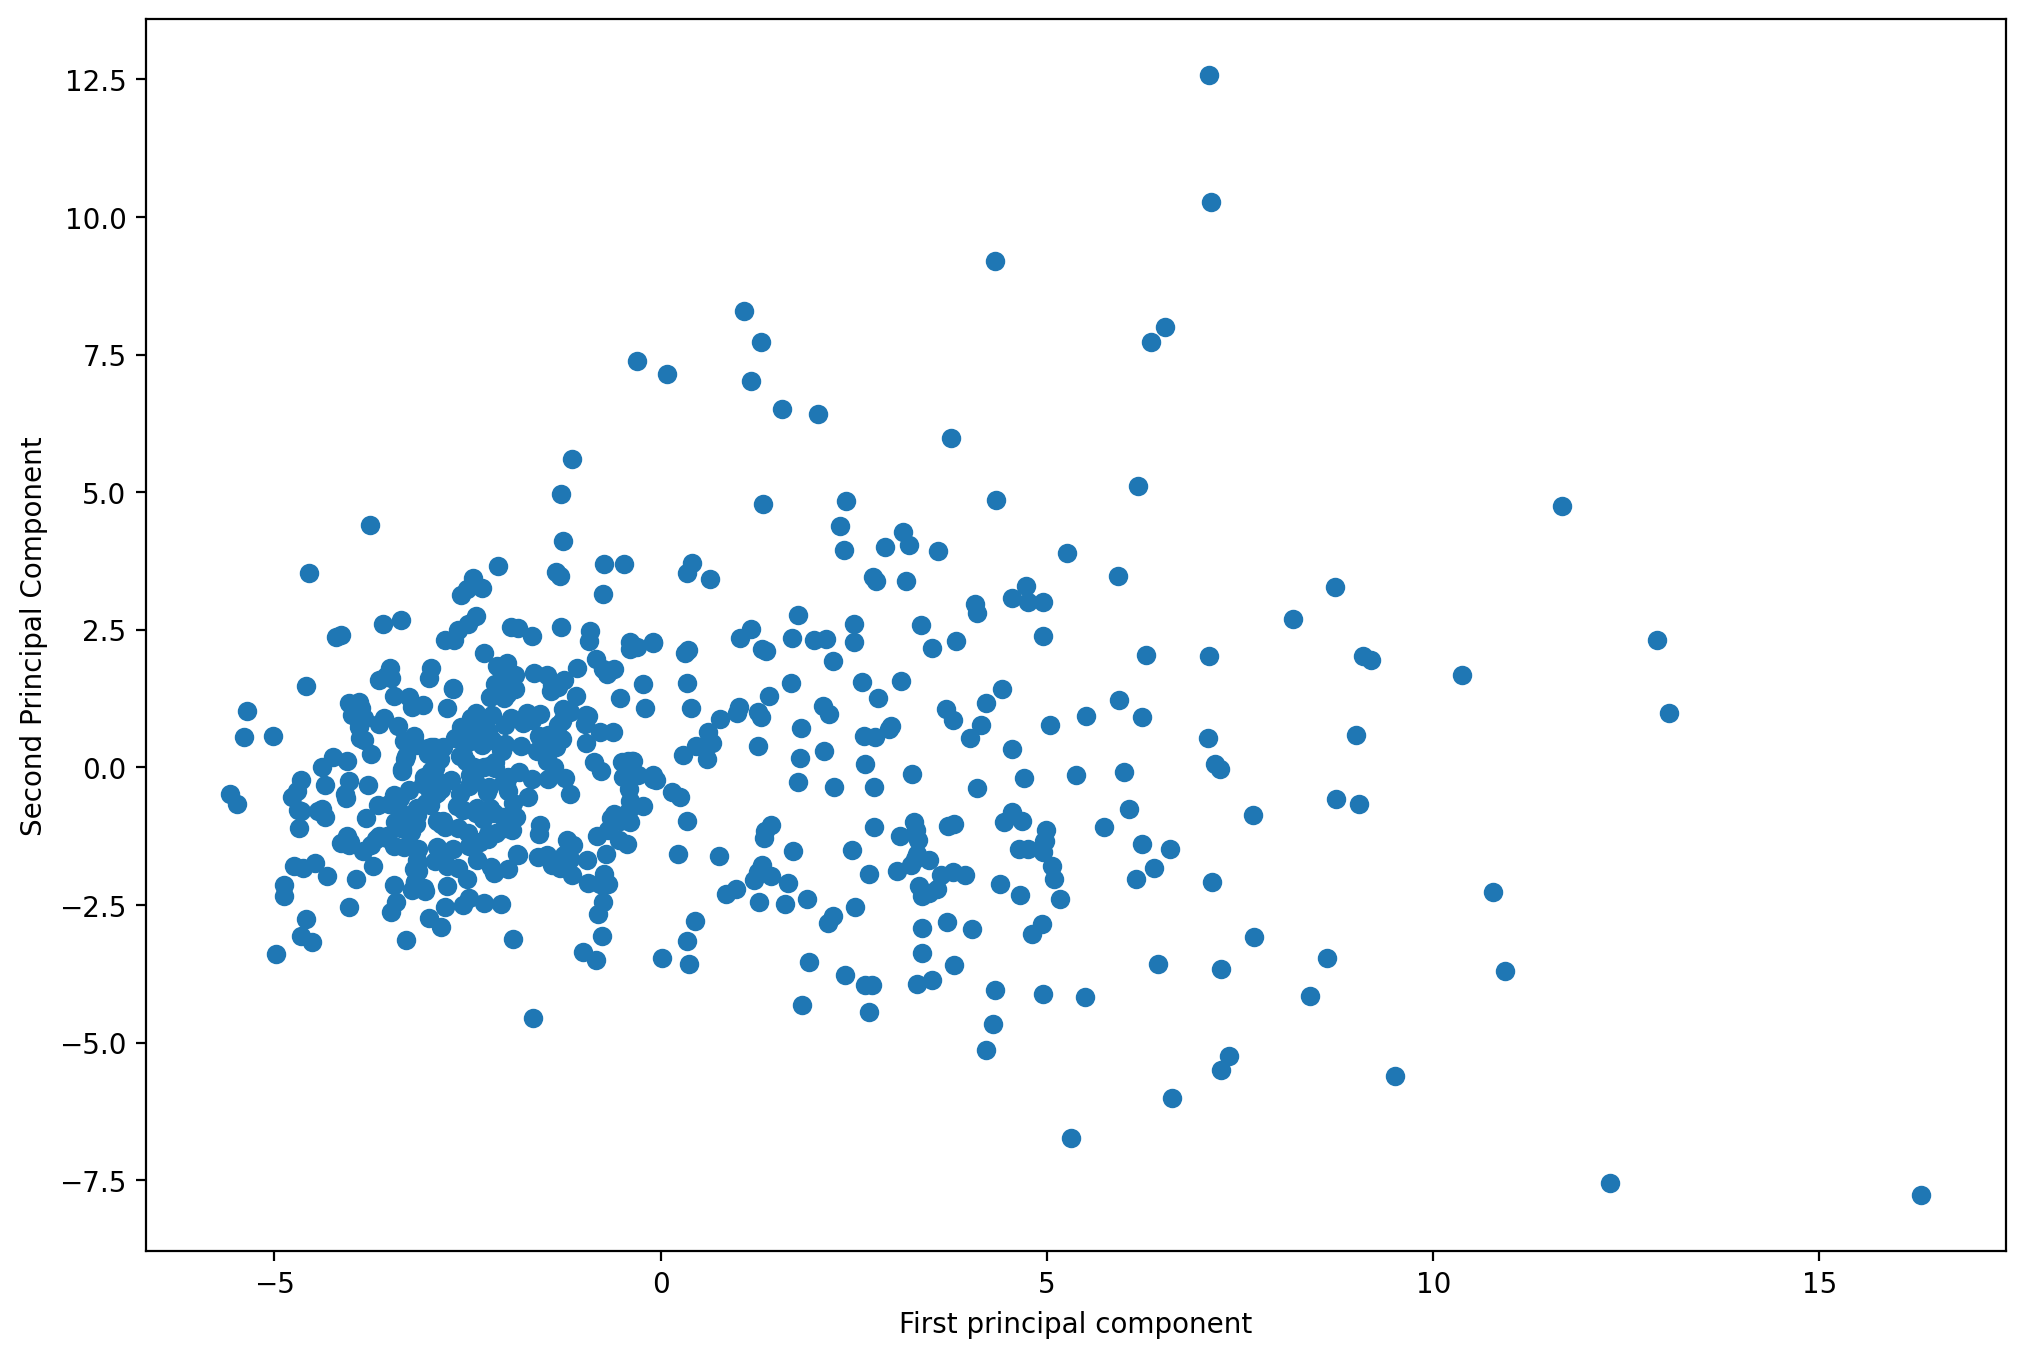

In [72]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x берём только первую колонку с индексом 0
# По оси y берём только вторую колонку с индексом 1
# Такой синтаксис используется потому что principal_components - массив numpy
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

### Эти данные можно также получить напрямую из Scikit-Learn 

In [75]:
from sklearn.datasets import load_breast_cancer

In [77]:
cancer_dictionary = load_breast_cancer()

In [79]:
type(cancer_dictionary)

sklearn.utils._bunch.Bunch

In [81]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [83]:
print(cancer_dictionary['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [85]:
cancer_dictionary['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Сохранилась ли возможность разделить данные на два класса при переходе от 30 признаков к 2 признакам?

Когда выполнялось сокращение колонок с 30 до 2, количество строк никак не сокращалось. Остались те же самые строки, причём в том же порядке, что и в исходных данных. Поэтому можно указать `c=cancer_dictionary['target']`, так как эти значения полностью соответствуют исходным строкам.

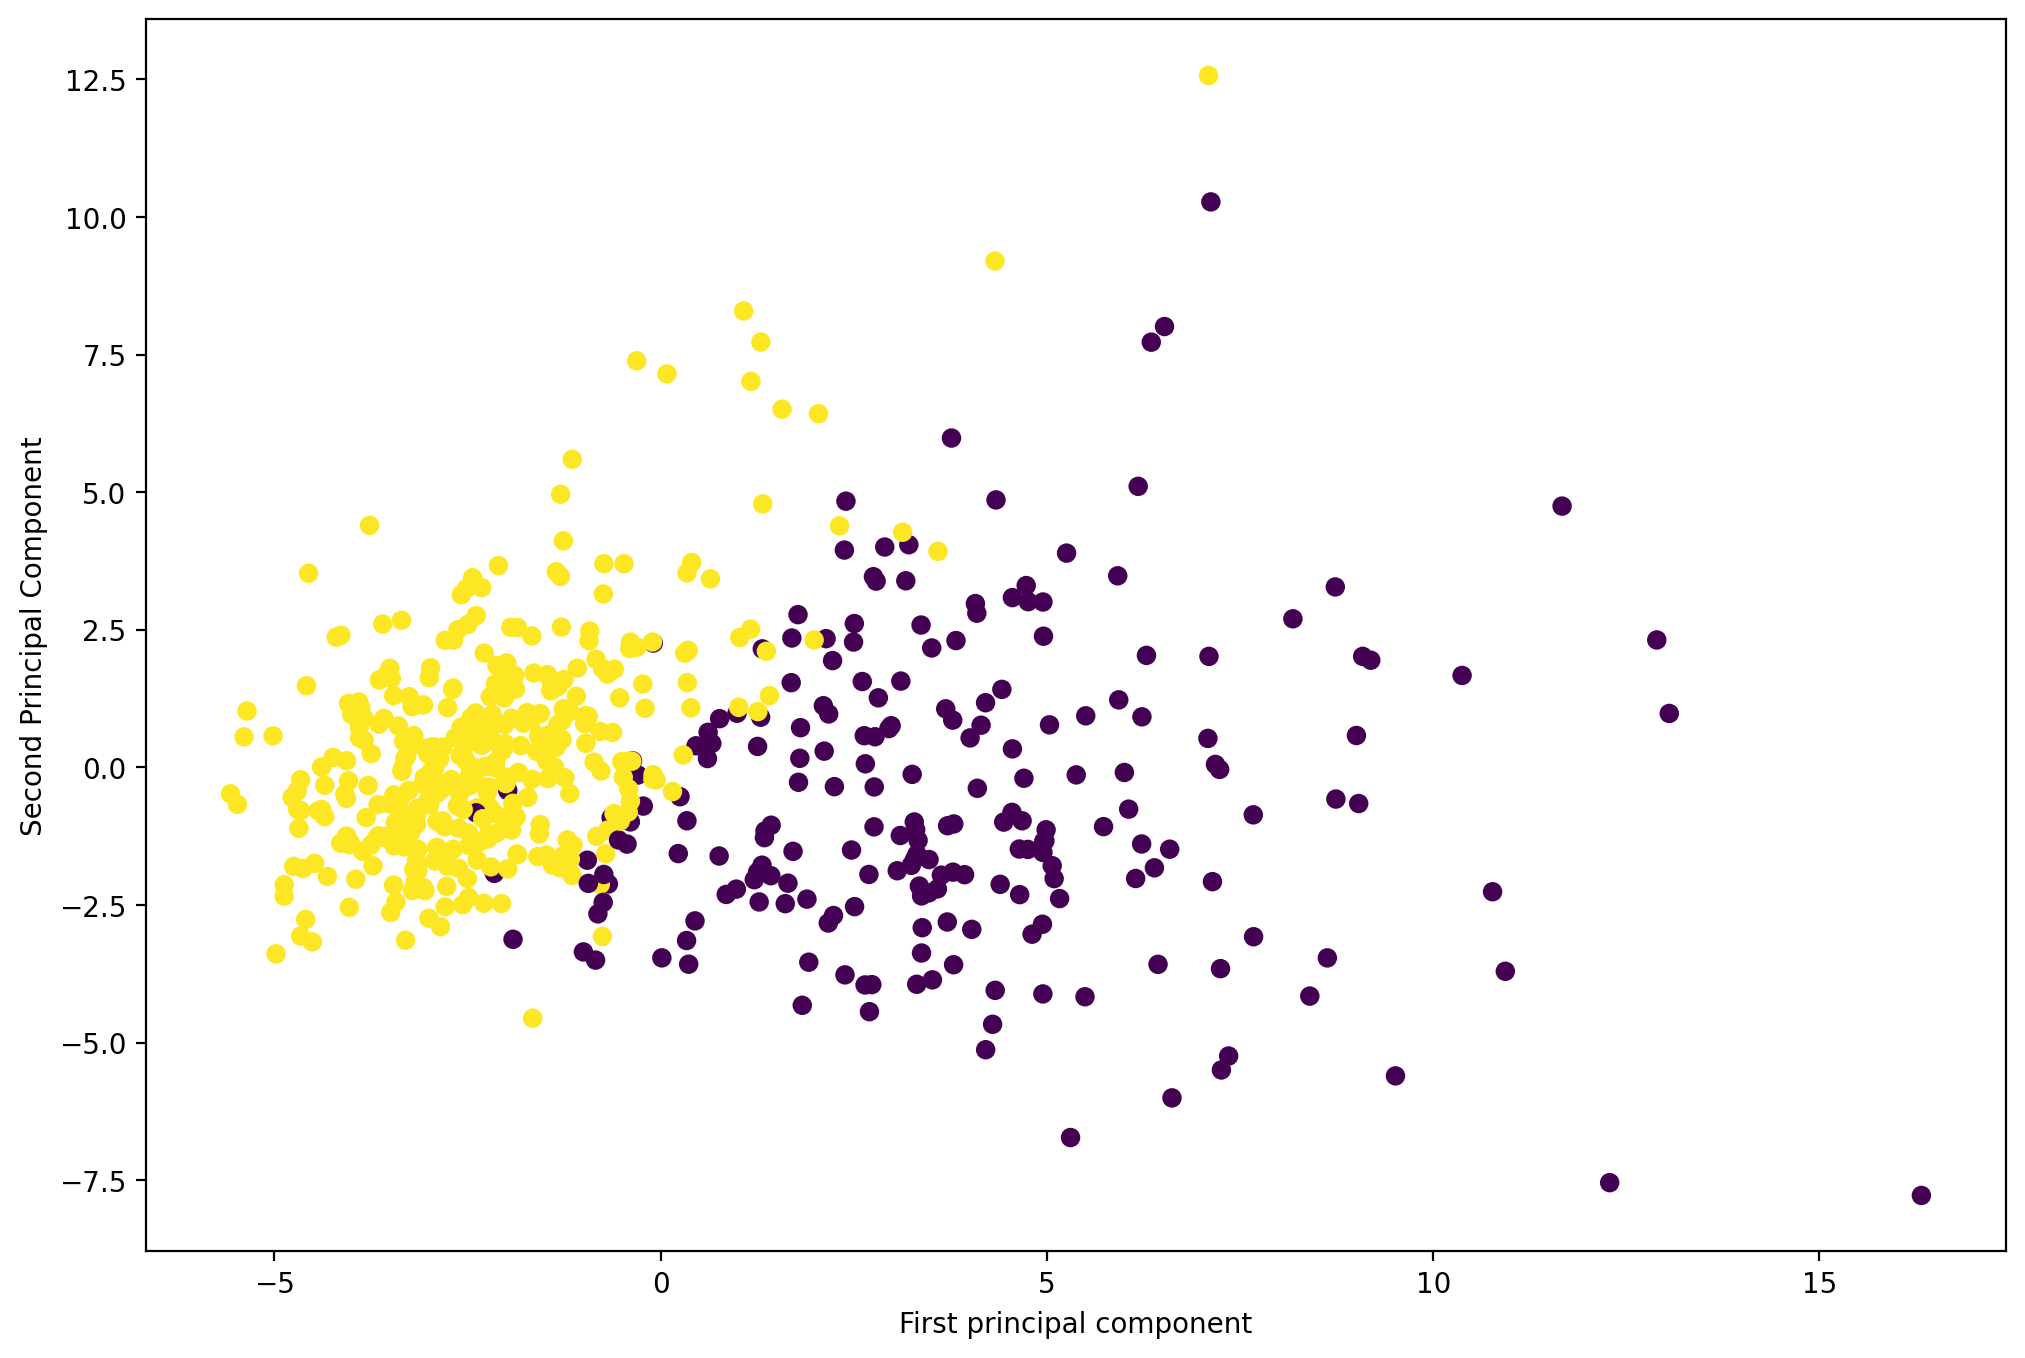

In [92]:
plt.figure(figsize=(12, 8), dpi=200)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cancer_dictionary['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

Возможность разделения данных на два класса была сохранена.

Как это можно использовать?
---

Можно существенно ускорить работу моделей машинного обучения для классификации данных. Для этого, сначала, с помощью метода главных компонент необходимо сократить количество измерений, а затем уже применять модель машинного обучения для классификации данных. Эта модель будет работать заметно быстрее, потому что количество признаков будет существенно уменьшено.